In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import random
import os

In [3]:
BASE = '/Users/qiongwu/git/cmpe258-team-project/'
PATH = '/Users/qiongwu/git/cmpe258-team-project/data/Labelled-Faces-in-the-Wild-LFW/lfw-deepfunneled/'

In [4]:
files = []
folders = !ls {PATH}
len(folders)

5749

In [5]:
multi_file_folders = []
for folder in folders:
    files = !ls {PATH + folder}
    if len(files) >=2 :
        multi_file_folders.append(folder)
multi_file_folders

['Aaron_Peirsol',
 'Aaron_Sorkin',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdullah',
 'Abdullah_Gul',
 'Abdullah_al-Attiyah',
 'Abdullatif_Sener',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Adam_Sandler',
 'Adam_Scott',
 'Adel_Al-Jubeir',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adrian_McPherson',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Ahmad_Masood',
 'Ahmed_Chalabi',
 'Ahmet_Necdet_Sezer',
 'Ai_Sugiyama',
 'Aicha_El_Ouafi',
 'Aitor_Gonzalez',
 'Akbar_Hashemi_Rafsanjani',
 'Akhmed_Zakayev',
 'Al_Davis',
 'Al_Gore',
 'Al_Pacino',
 'Al_Sharpton',
 'Alan_Ball',
 'Alan_Greenspan',
 'Alan_Mulally',
 'Alastair_Campbell',
 'Albert_Costa',
 'Alberto_Fujimori',
 'Alberto_Ruiz_Gallardon',
 'Albrecht_Mentz',
 'Aldo_Paredes',
 'Alec_Baldwin',
 'Alejandro_Atchugarry',
 'Alejandro_Avila',
 'Alejandro_Toledo',
 'Aleksander_Kwasniewski',
 'Alex_Barros',
 'Alex_Penelas',
 'Alex_Sink',
 'Alexander_Downer',
 'Alexander_Losyukov',
 'Alexander_Rumyantsev',
 'Alexandra_Stevenson',


In [6]:
print(len(multi_file_folders))

1680


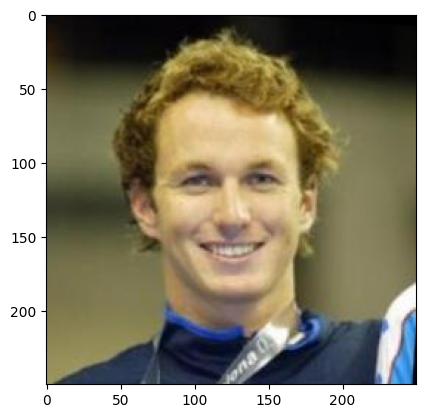

In [7]:
sample_folder = multi_file_folders[0]
sample_file_names = !ls {PATH + sample_folder}
img = cv2.imread(PATH + sample_folder + "/"+ sample_file_names[2])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
def generate_match_list(input_path):
    folder_list = [f for f in os.listdir(input_path) if not f.startswith('.')]
    for folder in folder_list:
        file_list = os.listdir(os.path.join(input_path, folder))
        random.shuffle(file_list)

        for i in range(len(file_list)):
            if i < len(file_list) - 1:
                match_list.append(os.path.join(folder, file_list[i]) + " " + os.path.join(folder, file_list[i + 1]) + " " + str(1))
                    
    return match_list

In [9]:
def generate_path_list(input_path):
    folder_list = [f for f in os.listdir(input_path) if not f.startswith('.')]
    for folder in folder_list:
        paths_in_folder = [os.path.join(folder, j) for j in os.listdir(os.path.join(input_path, folder))]
        path_list.append(paths_in_folder)
    return path_list

In [10]:
def generate_unmatch_list(path_list):
    temp= []
    for index, l in enumerate(path_list):
        file_list = path_list[index]
        if len(file_list) > 1:
            randomNum = random.randint(1, len(file_list)) - 1
            temp.append(file_list[randomNum])
            path_list[index].remove(file_list[randomNum])

    random.shuffle(temp)
    if len(temp) > 1:
        for i in range(len(temp)):
            if i < len(temp) - 1:
                unmatch_list.append(temp[i] + " " + temp[i+1] + " " + str(0))

    jj = [val[0] for val in path_list]
    for i in range(len(jj)):
        if i < len(jj) - 1:
            unmatch_list.append(jj[i] + " " + jj[i+1] + " " + str(0))
            
    return unmatch_list

In [11]:
match_list = []
unmatch_list = []
path_list = []
input_path = PATH
output_path = os.path.join(BASE, "temp")


match_list = generate_match_list(input_path)
path_list = generate_path_list(input_path)
unmatch_list = generate_unmatch_list(path_list)

In [12]:
match_list

['Paul_McNulty/Paul_McNulty_0002.jpg Paul_McNulty/Paul_McNulty_0001.jpg 1',
 'Claudia_Pechstein/Claudia_Pechstein_0005.jpg Claudia_Pechstein/Claudia_Pechstein_0003.jpg 1',
 'Claudia_Pechstein/Claudia_Pechstein_0003.jpg Claudia_Pechstein/Claudia_Pechstein_0002.jpg 1',
 'Claudia_Pechstein/Claudia_Pechstein_0002.jpg Claudia_Pechstein/Claudia_Pechstein_0001.jpg 1',
 'Claudia_Pechstein/Claudia_Pechstein_0001.jpg Claudia_Pechstein/Claudia_Pechstein_0004.jpg 1',
 'Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg 1',
 'Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg 1',
 'Mary-Kate_Olsen/Mary-Kate_Olsen_0003.jpg Mary-Kate_Olsen/Mary-Kate_Olsen_0002.jpg 1',
 'Mary-Kate_Olsen/Mary-Kate_Olsen_0002.jpg Mary-Kate_Olsen/Mary-Kate_Olsen_0001.jpg 1',
 'Phil_Mickelson/Phil_Mickelson_0001.jpg Phil_Mickelson/Phil_Mickelson_0002.jpg 1',
 'Salma_Hayek/Salma_Hayek_0009.jpg Salma_Hayek/Salma_Hayek_0013.

In [13]:
unmatch_list

['Amram_Mitzna/Amram_Mitzna_0001.jpg Christian_Longo/Christian_Longo_0001.jpg 0',
 'Christian_Longo/Christian_Longo_0001.jpg Amber_Tamblyn/Amber_Tamblyn_0002.jpg 0',
 'Amber_Tamblyn/Amber_Tamblyn_0002.jpg Mario_Dumont/Mario_Dumont_0001.jpg 0',
 'Mario_Dumont/Mario_Dumont_0001.jpg Michael_Jackson/Michael_Jackson_0010.jpg 0',
 'Michael_Jackson/Michael_Jackson_0010.jpg Robert_Bullock/Robert_Bullock_0002.jpg 0',
 'Robert_Bullock/Robert_Bullock_0002.jpg Hans_Blix/Hans_Blix_0036.jpg 0',
 'Hans_Blix/Hans_Blix_0036.jpg Rupert_Grint/Rupert_Grint_0001.jpg 0',
 'Rupert_Grint/Rupert_Grint_0001.jpg Sally_Ride/Sally_Ride_0001.jpg 0',
 'Sally_Ride/Sally_Ride_0001.jpg Chanda_Rubin/Chanda_Rubin_0004.jpg 0',
 'Chanda_Rubin/Chanda_Rubin_0004.jpg Marissa_Jaret_Winokur/Marissa_Jaret_Winokur_0002.jpg 0',
 'Marissa_Jaret_Winokur/Marissa_Jaret_Winokur_0002.jpg Abdoulaye_Wade/Abdoulaye_Wade_0001.jpg 0',
 'Abdoulaye_Wade/Abdoulaye_Wade_0001.jpg Larry_Johnson/Larry_Johnson_0002.jpg 0',
 'Larry_Johnson/Larry_John

In [14]:
len(match_list)

7484

In [15]:
len(match_list)

7484

In [16]:
len(path_list)

5749